<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>

# Plotting directly with Matplotlib

Estimated time needed: **45** minutes

## Objectives

After completing this lab you will be able to:

*   Create and customize basic plots directly with Matplotlib on dataset


# Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px"> 

1. [Import Libraries](#0)<br>
2. [Fetching Data](#1)<br>
3. [Line Plot](#2)<br>
4. [Scatter Plot](#3)<br>
5. [Bar Plot](#4)<br>
6. [Histogram](#5)<br>
7. [Pie](#6)<br>
8. [Subplotting](#7)<br>

</div>

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Fetching Data<a id="1"></a>

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website.<br>
In this lab, we will focus on the Canadian Immigration data and use the *already cleaned dataset* and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.
<br><br>
You can refer to the lab on data pre-processing wherein this dataset is cleaned for a quick refresh your Panads skill [Data pre-processing with Pandas](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/june2023_updates/Module%201/DV0101EN-Exercise-Dataset-Preprocessing-Exploring-with-Pandas.ipynb)


In [4]:
# set dataframe
df_can = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv")

# set index to country
df_can.set_index('Country', inplace=True)

In [5]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
print('Data dimensions:', df_can.shape)

Data dimensions: (195, 38)


In [7]:
# Create a list of years from 1980 - 2013 for plotting
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Line Plot<a id="2"></a>


A line plot displays the relationship between two continuous variables over a continuous interval, showing the trend or pattern of the data.<br><br>Let's created a line plot to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a line plot directly on `axes` by calling plot function `plot()`


In [8]:
# Create df with only years columns from 1980 to 2013
df_line = df_can[years].transpose()

# Applying sum to get total immigrants year-wise
df_line['Total'] = df_line.sum(axis=1)

In [9]:
df_line.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Total
1980,16,1,80,0,0,1,0,368,0,702,...,128,0,0,103,1191,0,1,11,72,99137
1981,39,0,67,1,0,3,0,426,0,639,...,132,0,0,117,1829,0,2,17,114,110563
1982,39,0,71,0,0,6,0,626,0,484,...,146,0,0,174,2162,0,1,11,102,104271
1983,47,0,69,0,0,6,0,241,0,317,...,105,0,0,124,3404,0,6,7,44,75550
1984,71,0,63,0,0,4,42,237,0,317,...,90,0,0,142,7583,0,0,16,32,73417


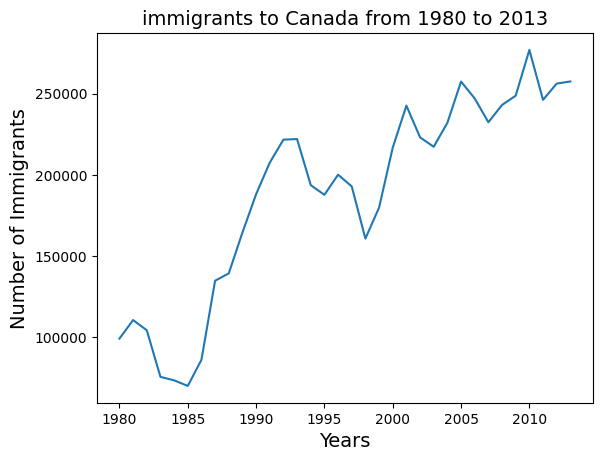

In [10]:
# set index to integer for plotting
df_line.index = df_line.index.map(int)

# create a figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(df_line['Total'])

# Setting up the title and labels
ax.set_title('immigrants to Canada from 1980 to 2013', fontsize=14)
ax.set_xlabel('Years', fontsize=14)
ax.set_ylabel('Number of Immigrants', fontsize=14)

plt.show()

#### **Let's Customize the plot's appearance**

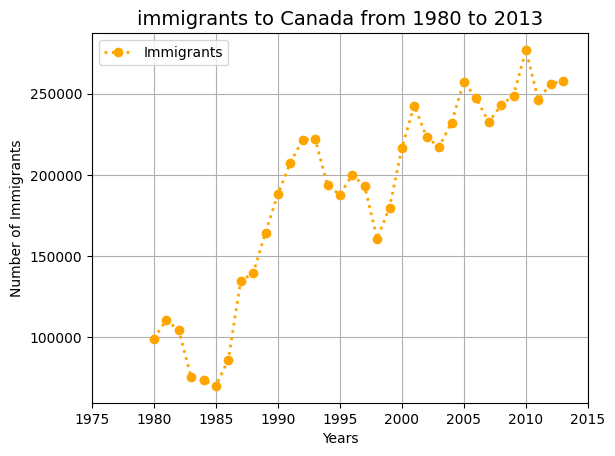

In [11]:
# set index to integer for plotting
df_line.index = df_line.index.map(int)

# create a figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(df_line['Total'],
        color = 'orange',
        marker = 'o',
        linestyle = 'dotted',
        linewidth = 2,
        markersize = 6)

# Setting up the title and labels
ax.set_title('immigrants to Canada from 1980 to 2013', fontsize=14)
ax.set_xlabel('Years', fontsize=10)
ax.set_ylabel('Number of Immigrants', fontsize=10)
ax.legend(['Immigrants']) # add a legend
ax.grid(True)   # add a grid
ax.set_xlim(1975, 2015) # add x-axis limits

plt.show()

Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

### Question: Plot a line graph of immigration from Haiti 


In [12]:
df_haiti = df_can.loc[['Haiti'], years].transpose()
df_haiti.index = df_haiti.index.map(int)

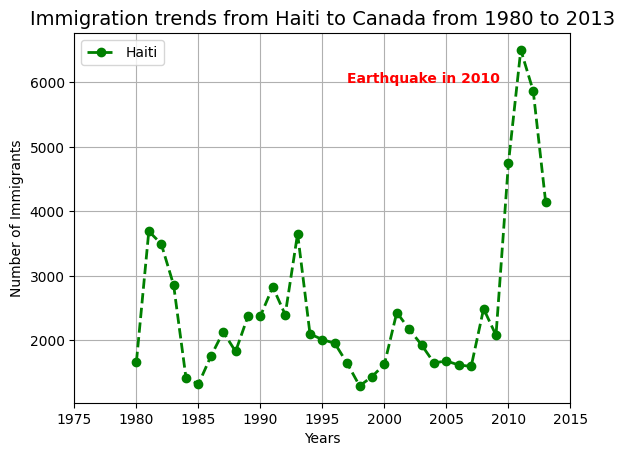

In [13]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the line
ax.plot(df_haiti,
        color = 'green',
        marker = 'o',
        linestyle = 'dashed',
        linewidth = 2,
        markersize = 6)

# Setting up the tittle and labels
ax.set_title('Immigration trends from Haiti to Canada from 1980 to 2013', fontsize=14)
ax.set_xlabel('Years', fontsize=10)
ax.set_ylabel('Number of Immigrants', fontsize=10)
ax.legend(['Haiti'])
ax.grid(True)
ax.set_xlim(1975, 2015)

# Creata annotations for earthquakes notice
ax.annotate('Earthquake in 2010', 
            xy=(2010, 6000), 
            xytext=(1997, 6000),
            color='red',
            fontweight='bold',
            )   

plt.show()

# Scatter Plot <a id="3"></a>

A scatter plot visualizes the relationship between two continuous variables, displaying individual data points as dots on a two-dimensional plane, allowing for the examination of patterns, clusters, and correlations.<br><br>Let's created a *Scatter plot* to visualize the immigrants (to Canada) trend during 1980 to 2013.<br>We need the Total of year-wise immigrants,<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe<br><br>You can do create a scatter plot directly on **ax** by calling plot function **scatter()**


In [14]:
# Create a new df that sums the total of immigrants per year
total_immigrants = df_can[years].transpose()
total_immigrants['Total'] = total_immigrants.sum(axis=1)
total_immigrants.head()

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe,Total
1980,16,1,80,0,0,1,0,368,0,702,...,128,0,0,103,1191,0,1,11,72,99137
1981,39,0,67,1,0,3,0,426,0,639,...,132,0,0,117,1829,0,2,17,114,110563
1982,39,0,71,0,0,6,0,626,0,484,...,146,0,0,174,2162,0,1,11,102,104271
1983,47,0,69,0,0,6,0,241,0,317,...,105,0,0,124,3404,0,6,7,44,75550
1984,71,0,63,0,0,4,42,237,0,317,...,90,0,0,142,7583,0,0,16,32,73417


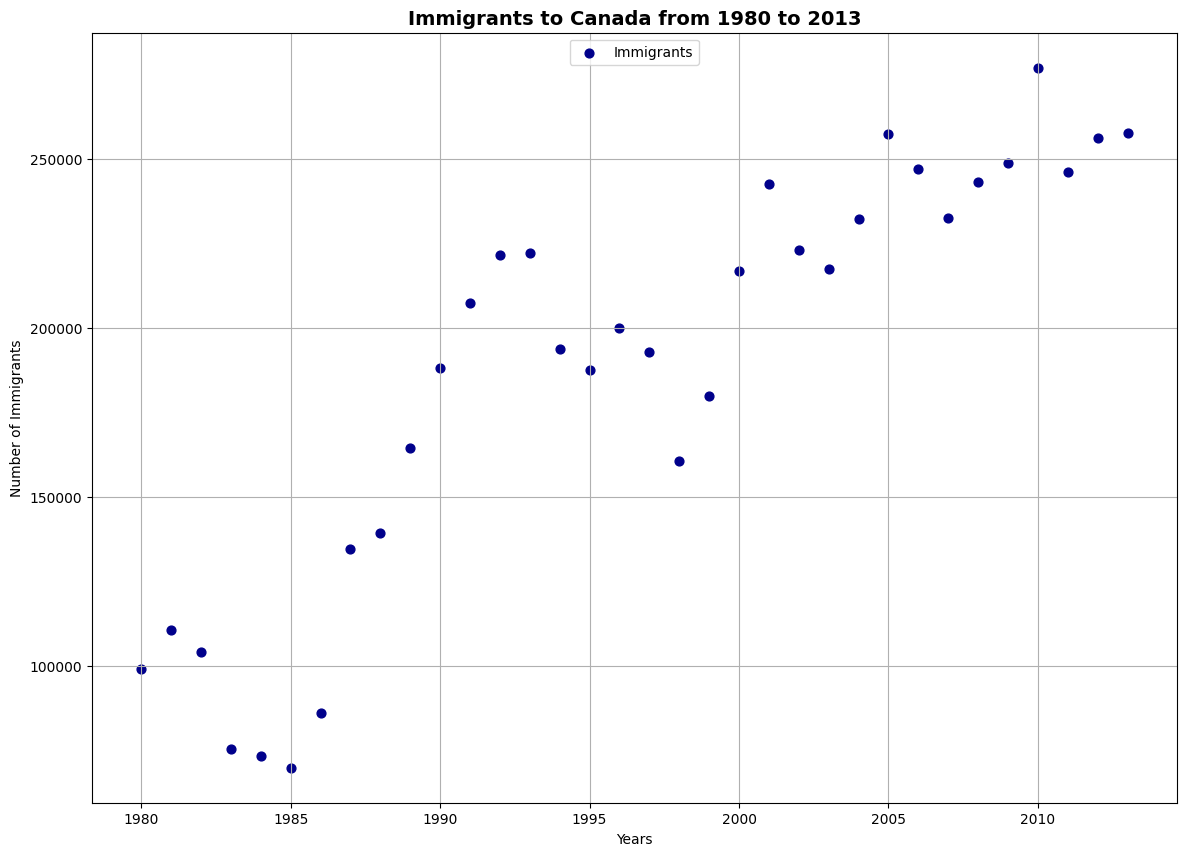

In [15]:
# set the index to integer for plotting
total_immigrants.index = total_immigrants.index.map(int)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(14,10))

# Create scatter plot
ax.scatter(total_immigrants.index, total_immigrants['Total'],
           marker='o', # marker shape
           s = 40, #  size of marker
           color='darkblue'
           )

# Setting up the title and labels
ax.set_title('Immigrants to Canada from 1980 to 2013', fontsize=14, fontweight='bold')
ax.set_xlabel('Years', fontsize=10)
ax.set_ylabel('Number of Immigrants', fontsize=10)
ax.grid(True) # add a grid
ax.legend(['Immigrants'], loc='upper center') # add a legend

plt.show()

### Refer to the [matplotlib documentation](https://matplotlib.org/stable/api/markers_api.html) and change the marker and its size, color in the above code to see the difference in the appearance of the plot


# Bar Plot <a id="4"></a>

A bar plot represents categorical data with rectangular bars, where the height of each bar corresponds to the value of a specific category, making it suitable for comparing values across different categories.<br><br>Let's create a bar plot to visualize the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. 
<br><br>Apply sort_values function on the 'Total' column of our data<br><br>We will create a new dataframe for only columns containing the years<br> then, we will apply sum() on the dataframe and can create a separatedataframe for top five countries<br><br>You can further use the names of the countries to label each bar on the plot


**STEP 1**: when creating `Bar Plot`, it's best to use a `sorted` data first (ascending or descending). So, we `sort` the data first!


In [16]:
# Sort the dataframe
df_can.sort_values(by='Total', ascending=False, inplace=True)

**STEP 2**: Create the top 5 countries dataframe

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_89534/2123849361.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Blues')


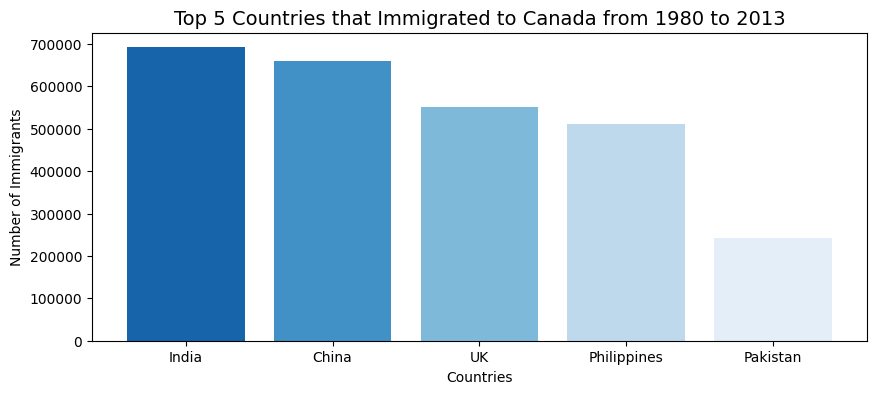

In [32]:
# Create a top 5 countries dataframe
df_top5 = df_can.head(5)

# Create label for the bar plot
label = list(df_top5.index)
label[2] = 'UK' # 'United Kingdom' to 'UK' for shorter label

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Let's import cmap from matplotlib for coloring the bars
from matplotlib import cm

# Define the color map
cmap = cm.get_cmap('Blues')
colors = [cmap(i) for i in np.linspace(0.8, 0.1, 5)]

# Create bar plot
ax.bar(label, df_top5['Total'], 
       color=colors)

# Setting up the title and labels
ax.set_title('Top 5 Countries that Immigrated to Canada from 1980 to 2013', fontsize=14)
ax.set_xlabel('Countries', fontsize=10)
ax.set_ylabel('Number of Immigrants', fontsize=10)

plt.show()

### Question: Create a bar plot of the 5 countries that contributed the **least** to immigration to Canada **from** 1980 to 2013. 


/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_89534/3339661841.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greens')


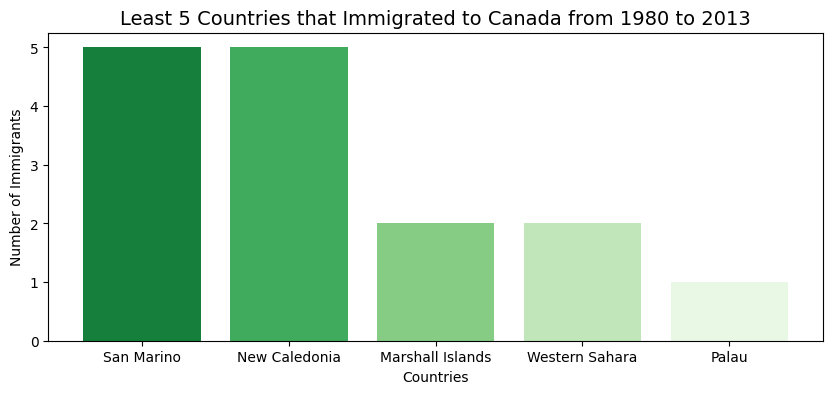

In [40]:
# Create a top 5 countries dataframe
df_least5 = df_can.tail(5)

# Create label for the bar plot
# label = list(df_least5.index)
# label[2] = 'UK' # 'United Kingdom' to 'UK' for shorter label

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 4))

# Let's import cmap from matplotlib for coloring the bars
from matplotlib import cm

# Define the color map
cmap = cm.get_cmap('Greens')
colors = [cmap(i) for i in np.linspace(0.8, 0.1, 5)]

# Create bar plot
ax.bar(df_least5.index, df_least5['Total'], 
       color=colors)

# Setting up the title and labels
ax.set_title('Least 5 Countries that Immigrated to Canada from 1980 to 2013', fontsize=14)
ax.set_xlabel('Countries', fontsize=10)
ax.set_ylabel('Number of Immigrants', fontsize=10)

plt.show()

# Histogram <a id="5"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.
<br><br>Let's find out the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?<br>


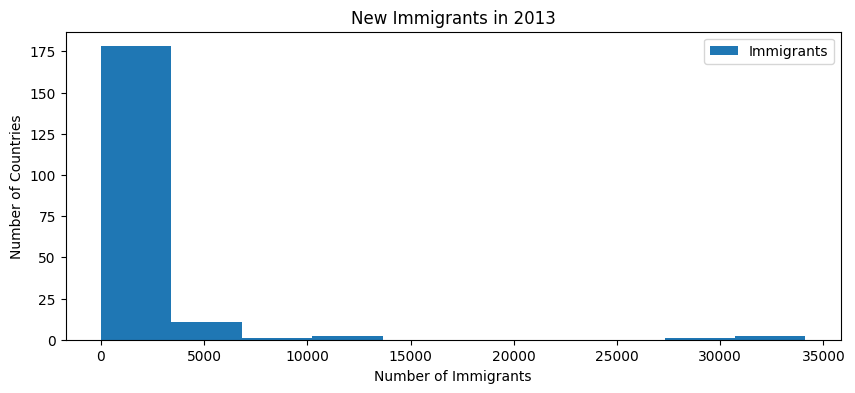

In [68]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_can['2013'])
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.legend(['Immigrants'])

#Display the plot
plt.show()

Our plot doesnot match with the bars<br>By default, the `histrogram` method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013<br> The hist function retuns list of arrays with 1. counts and 2. bins. we can fetch that using unpacking functionality <br> and further use the bins as x-ticks


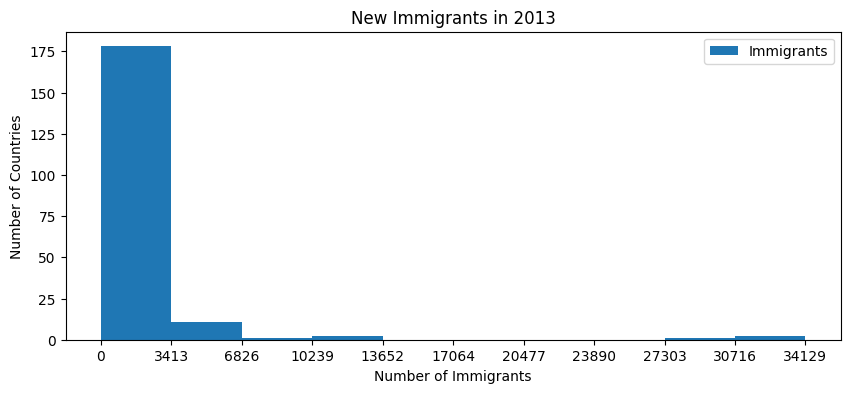

In [87]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
count, bins = np.histogram(df_can['2013']) # get the count and bins

ax.hist(df_can['2013'])
ax.set_title('New Immigrants in 2013') 
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Number of Countries')
ax.set_xticks(bins)
ax.legend(['Immigrants'])

#Display the plot
plt.show()

#### We can also plot multiple histograms on the same plot. For example, let's try to answer the following questions using a histogram.

#### What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?


In [89]:
df_DNS = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_DNS.index = df_DNS.index.map(int)

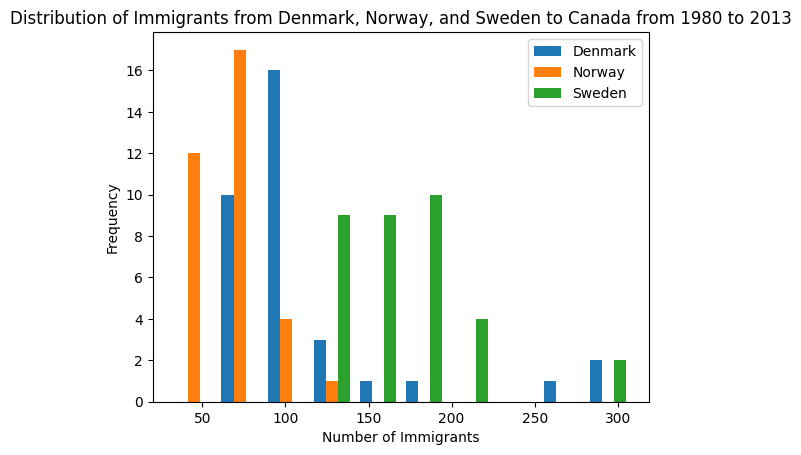

In [94]:
fig, ax = plt.subplots()

ax.hist(df_DNS)
ax.set_title('Distribution of Immigrants from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
ax.set_xlabel('Number of Immigrants')
ax.set_ylabel('Frequency')
ax.legend(['Denmark', 'Norway', 'Sweden'])

plt.show()

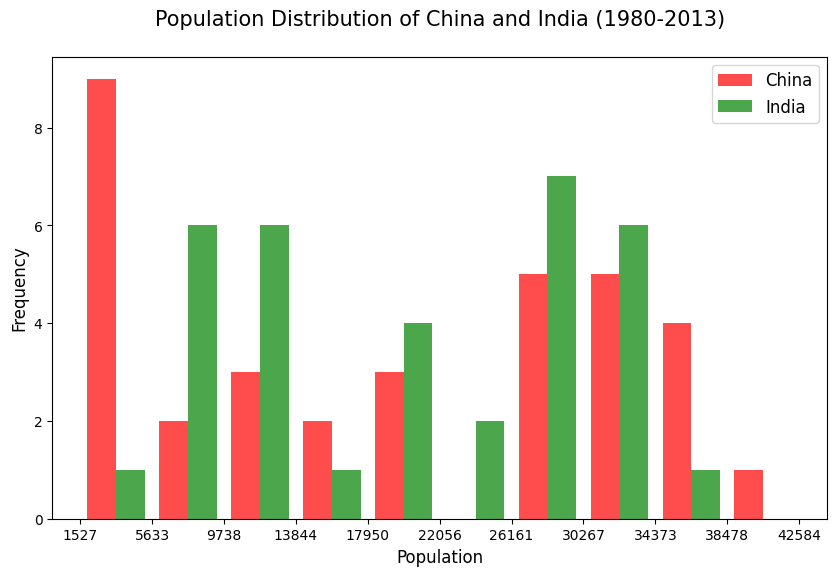

In [101]:
# Get the data for Denmark, Norway, and Sweden
df_CI = df_can.loc[['China', 'India'], years].transpose()
count, bins = np.histogram(df_CI) # get the count and bins

# Create a Histogram for Denmark, Norway, and Sweden
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis

# Customize the histogram
ax.hist(df_CI,
         color=['red', 'green'],  # Set colors for the bars
         alpha=0.7,  # Set transparency
         label=df_dns.columns)  # Use column names as labels
plt.title('Population Distribution of China and India (1980-2013)', y=1.05, fontsize=15)  # Title of the plot
plt.xlabel('Population', fontsize='large')  # X-axis label
plt.ylabel('Frequency', fontsize='large')  # Y-axis label
plt.xticks(bins)
plt.legend(loc='upper right', fontsize='large')  # Add legend with country names

plt.show()

# Pie Chart<a id="6"></a>

A pie chart represents the proportion or percentage distribution of different categories in a dataset using sectors of a circular pie.
<br> Let's create a pie chart representing the 'Total Immigrants' for the year 1980 to 1985


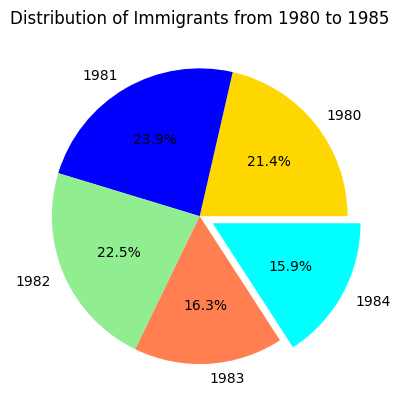

In [113]:
fig,ax=plt.subplots()

#Pie on immigrants
ax.pie(total_immigrants[0:5]['Total'], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1]) #using explode to highlight the lowest 

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

plt.title('Distribution of Immigrants from 1980 to 1985')
#plt.legend(years[0:5]), include legend, if you donot want to pass the labels
plt.show()

### Question: Create a pie chart representing the total immigrants proportion for each continent

First, you will have to group the data over continents and get the sum on total. Then you can pass this data to the pie function


In [122]:
# Get the data
df_continent = df_can.groupby('Continent', axis=0).sum()
df_continent = df_continent

# customize the labels
label = list(df_continent.index)
label[3] = 'LAC'
label[4] = 'NA'

/var/folders/49/8m_jrn05797603s8ygxw0j1w0000gn/T/ipykernel_89534/4195250651.py:2: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  df_continent = df_can.groupby('Continent', axis=0).sum()


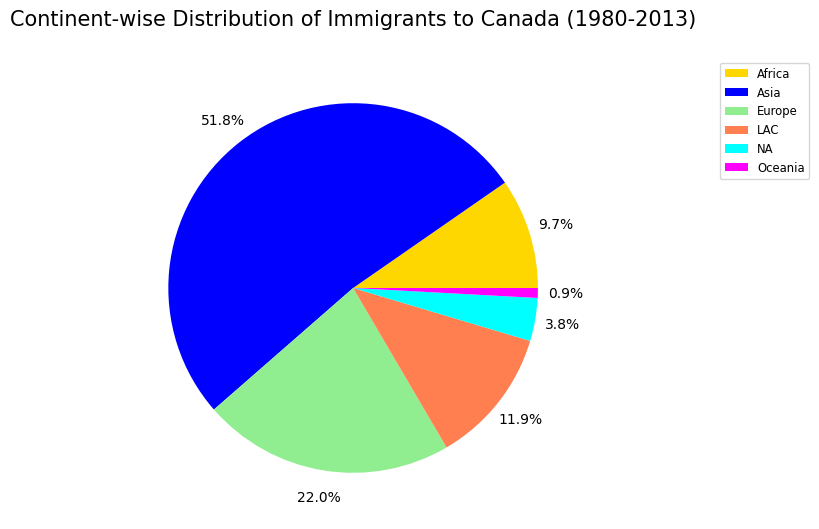

In [135]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create a pie chart
ax.pie(df_continent['Total'],
         colors = ['gold','blue','lightgreen','coral','cyan','magenta'],
         autopct='%1.1f%%',
         pctdistance=1.15)

ax.set_aspect('equal')  # Ensure pie is drawn as a circle

ax.set_title('Continent-wise Distribution of Immigrants to Canada (1980-2013)', y=1.05, fontsize=15)
ax.legend(labels=label, bbox_to_anchor=(1,0,0.5, 1), fontsize='small')
plt.show()

# Sub-plotting<a id="7"></a>


Let us explore how to display more than one plot on the same figure and specify the number of rows and columns to be created to the subplots function.  

For instance, let’s create a line and scatter plot in one row <br>
`plt.subplots()` <br>
You can use the same functions using which you plotte lne and scatter plots at the start of this lab
<br>
Both the subplots will be sharing the same y-axis as the data in the y-axis is the same. So, assign the `‘Sharey’` parameter as True in the code below. Also notice the use of 'suptitle'


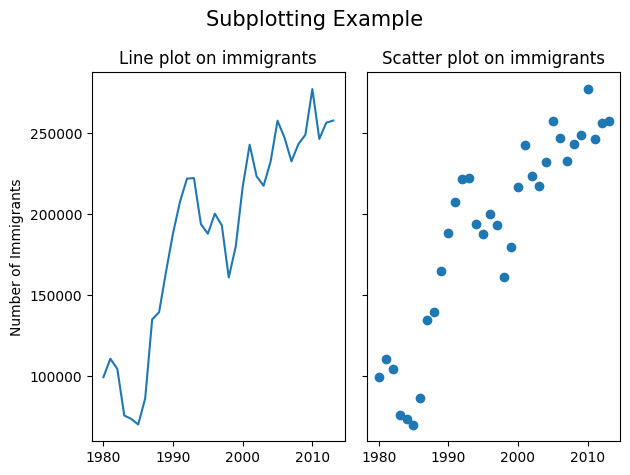

In [140]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants['Total'])
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants['Total'])
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

You can also implement the subplotting with **add_subplot()** as below:-


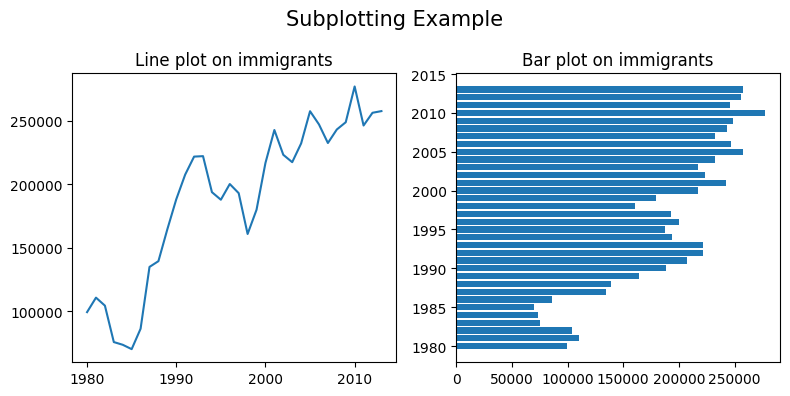

In [142]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8,4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
#Plotting in first axes - the left one
axs1.plot(total_immigrants['Total'])
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
#Plotting in second axes - the right one
axs2.barh(total_immigrants.index, total_immigrants['Total']) #Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

### Question: Choose any four plots, which you have developed in this lab, with subplotting display them in a 2x2 display


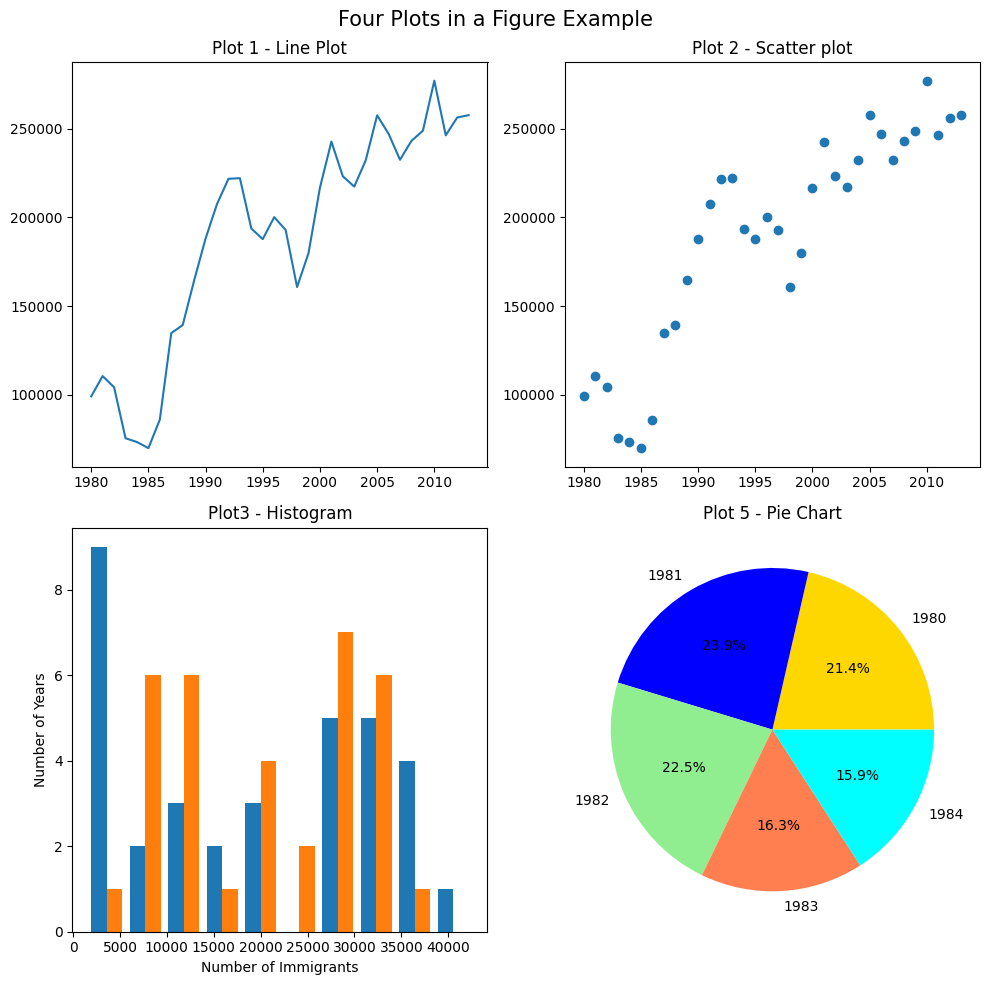

In [145]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(10, 10))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants['Total'])
ax1.set_title('Plot 1 - Line Plot')

# Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants['Total'])
ax2.set_title('Plot 2 - Scatter plot')

# Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)
ax3.set_title('Plot3 - Histogram') 
ax3.set_xlabel('Number of Immigrants')
ax3.set_ylabel('Number of Years')

# Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(total_immigrants[0:5]['Total'], labels=years[0:5], 
       colors = ['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%')
ax4.set_aspect('equal')  
ax4.set_title('Plot 5 - Pie Chart')

#Adding a Title for the Overall Figure
fig.suptitle('Four Plots in a Figure Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()